# Projeto Porto Inteligente
#### Union Squad – Daniel Rocha, Mateus Pinheiro, Letícia Fiorito, Wallys Souza, Everton Arruda
Este projeto visa ajudar na virtualização da cadeia logística integrada dos portos brasileiros

### Importando pacotes e fazendos ajustes:

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import palettable
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [6]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)

import matplotlib.style
import matplotlib as mpl
for m,n in zip(['grid.color','axes.titlecolor','axes.labelcolor','xtick.color','ytick.color','axes.titlesize',
    'figure.figsize','legend.framealpha'],['white','white','white','white','white','20.0','13.0, 8.0','0.8']):
    mpl.rcParams[m] = n

### Importando os dados de estadia:

In [218]:
stays = pd.read_csv('/Users/pedrocerbino/Downloads/ESTADIA/Estadia.csv',sep=';')
for i in ['Atracação Prevista','Atracação Efetiva','Desatracação Prevista','Desatracação Efetiva']:
    stays[i] = pd.to_datetime(stays[i],errors='coerce')
stays['Local(is) Atracação (área do porto > berço > cabeço)'] = [i.split(' > ')[1] for i in stays[
    'Local(is) Atracação (área do porto > berço > cabeço)']]
stays.rename(columns={'Local(is) Atracação (área do porto > berço > cabeço)':'Berço'},inplace=True)
stays.drop(columns=['Local(is) e Data(s) Reatracação (área do porto > berço > ca'],inplace=True)
stays['Código Bitrigrama'] = [i.split(' - ')[0] for i in stays['Porto de estadia atual']]
stays.head(2)

,Número do DUV,Estadia Off-Shore,Porto de estadia atual,Atracação Prevista,Atracação Efetiva,Desatracação Prevista,Desatracação Efetiva,Berço,Bandeira da Embarcação,Área de Navegação,Finalidade da Embarcação,Tipo de Embarcação,Motivo de Atracação,Tipo de Viagem Chegada,Tipo de Viagem Saída,Especialidade da Carga Predominante
0,8e0879c460c1314a25bea44f73974e3e,Não,BRRIO - RIO DE JANEIRO,2016-12-31 17:30:00,2017-01-01 07:20:00,2017-01-01 15:00:00,2017-01-01 16:00:00,2C21,Libéria,IMPORT/EXPORT/LONGO CURSO,Transporte de Contentores,Porta Contentor,Carga e Descarga,EXPORTAÇÃO/LONGO CURSO,IMPORTAÇÃO/LONGO CURSO,Conteiner
1,77a23e1146e03847763ea5aaa70ecbc3,Não,BRSSZ - SANTOS,2017-01-01 02:00:00,2017-01-01 08:30:00,2017-02-01 01:00:00,2017-02-01 03:15:00,EPORT II,Libéria,IMPORT/EXPORT/LONGO CURSO,Transporte de Contentores,Porta Contentor,Carga e Descarga,EXPORTAÇÃO/LONGO CURSO,IMPORTAÇÃO/LONGO CURSO,Conteiner


In [1025]:
stays['Porto de estadia atual'].value_counts(True)[:15]

BRSSZ - SANTOS                  0.178840
BRRIO - RIO DE JANEIRO          0.140936
BRPNG - PARANAGUA               0.079988
BRRIG - RIO GRANDE              0.059064
BRSUA - SUAPE                   0.055845
BRVIX - VITÓRIA                 0.035221
BRIQI - ITAQUI                  0.027598
BRIGI - ITAGUAÍ                 0.027037
BRFOR - FORTALEZA (MUCURIPE)    0.025702
BRSSA - SALVADOR                0.025253
BRNTR - NITERÓI                 0.024928
BRPEC - PECEM                   0.023593
BRARB - ARATU                   0.021285
BRVDC - VILA DO CONDE           0.020274
BRSFS - SAO FRANCISCO DO SUL    0.016494
Name: Porto de estadia atual, dtype: float64

In [3081]:
dex = stays['Atracação Efetiva'].astype('datetime64[ns]')
data = pd.DataFrame({'Date':dex.dt.date,'Hour':dex.dt.hour,'Data':(stays
    ['Atracação Prevista'] - stays['Atracação Efetiva']).astype('timedelta64[h]')}).groupby(
    ['Date','Hour'],as_index=False).mean()
data['Média Diária'] = data.Data.rolling(24).mean()
data.set_index(data.Date,inplace=True)
data.drop(columns=['Date'],inplace=True)
data

,Hour,Data,Média Diária
Date,,,
2017-01-01,7,-14.000000,NaN
2017-01-01,8,-34.500000,NaN
2017-01-01,9,-289.000000,NaN
2017-01-01,10,-16.666667,NaN
2017-01-01,11,-14.200000,NaN
...,...,...,...
2019-12-30,18,-53.750000,-8.045337
2019-12-30,19,-9.500000,-7.857837
2019-12-30,20,-16.666667,-7.302282


In [3083]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.Data[-8330:].index, y=data.Data[-8330:].values,
                         line=dict(color='rgba(240, 52, 52, 0.5)'), name='Dados'))
fig.add_trace(go.Scatter(x=data.Data[-8330:].index, y=data.Data[-8330:].rolling(24).mean().values,
                         line=dict(color='yellow'), name='Média Diária'))
fig.update_layout(template='plotly_dark')
fig.update_layout(title='Diferença da Atracação Efetiva e Prevista por Hora – 2019',
                  template='plotly_dark',
                  xaxis_title='Data',
                  yaxis_title='Horas')
fig.show();
# fig.write_html("/Users/pedrocerbino/Downloads/Graph_2.html")

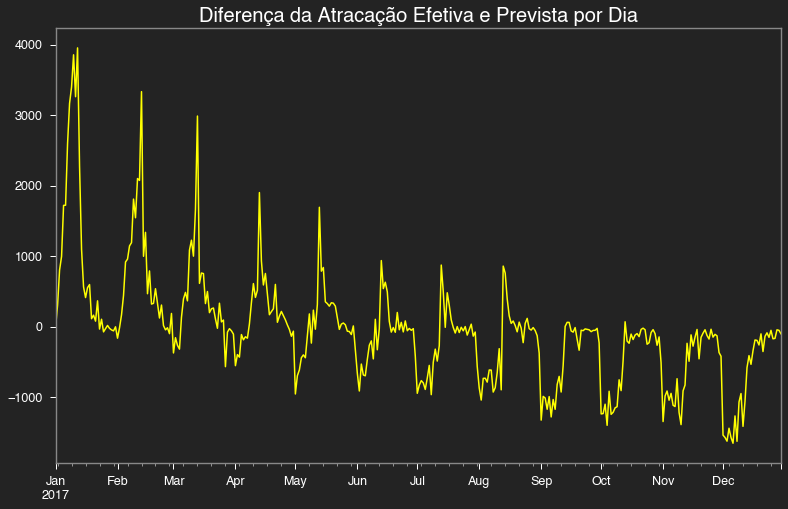

In [23]:
pd.Series(data=(stays['Atracação Prevista'] - stays['Atracação Efetiva']).astype(
    'timedelta64[h]').values, index=stays['Atracação Efetiva'].astype(
    'datetime64[D]').values).groupby(level=0).mean()[:364].plot(color='yellow')
plt.title('Diferença da Atracação Efetiva e Prevista por Dia');

### Verificando a distribuição dos dados

In [48]:
stays['Finalidade da Embarcação'].value_counts(normalize=True) 

Transporte de Contentores       0.240262
Transporte de Granel Sólido     0.237130
Transporte de Granel Líquido    0.187536
Apoio Marítimo                  0.142907
Transporte de Carga Geral       0.071890
                                  ...   
Dragagem                        0.001235
Lançamento de Cabos             0.001173
Lazer                           0.000200
Pesca                           0.000100
Recreio                         0.000075
Name: Finalidade da Embarcação, Length: 18, dtype: float64

In [49]:
stays['Tipo de Embarcação'].value_counts(normalize=True) 

Graneleiro                        0.275970
Porta Contentor                   0.249395
Supply                            0.101422
Petroleiro                        0.088908
Carga Geral                       0.076357
                                    ...   
Navio sonda                       0.000050
Navio cisterna                    0.000050
Passageiros / Roll-On Roll-Off    0.000050
Plataforma                        0.000037
Ferry Boat                        0.000025
Name: Tipo de Embarcação, Length: 20, dtype: float64

In [55]:
stays['Especialidade da Carga Predominante'].value_counts(normalize=True) 

Granel Sólido     0.277218
Conteiner         0.270593
Granel Líquido    0.211876
Carga Geral       0.208543
Ro-Ro             0.031770
Name: Especialidade da Carga Predominante, dtype: float64

In [3066]:
stays[stays['Especialidade da Carga Predominante']=='Granel Sólido'][
    'Porto de estadia atual'].value_counts()

BRSSZ - SANTOS                                                 3703
BRPNG - PARANAGUA                                              2135
BRRIG - RIO GRANDE                                             1670
BRPMA001 - PONTA DA MADEIRA - VALE                             1091
BRARE - AREIA BRANCA (TERMISA)                                 1089
                                                               ... 
BRARB003 - DOW BRASIL - ARATU - BA                                1
BRVIX008 - CIA PORTUARIA VILA VELHA - CPVV - ES                   1
BRADR - ANGRA DOS REIS                                            1
BRARB009 - TRBA - TERMINAL DE REGAISEFICAÇÃO DE GAS NATURAL       1
BRARB004 - FORD MOTOR - ARATU - BA                                1
Name: Porto de estadia atual, Length: 64, dtype: int64

In [57]:
stays[stays['Especialidade da Carga Predominante']=='Granel Sólido'].head(2)

,Número do DUV,Estadia Off-Shore,Porto de estadia atual,Atracação Prevista,Atracação Efetiva,Desatracação Prevista,Desatracação Efetiva,Local(is) Atracação (área do porto > berço > cabeço),Local(is) e Data(s) Reatracação (área do porto > berço > ca,Bandeira da Embarcação,Área de Navegação,Finalidade da Embarcação,Tipo de Embarcação,Motivo de Atracação,Tipo de Viagem Chegada,Tipo de Viagem Saída,Especialidade da Carga Predominante
6,68ef5810d04da2dc637f25cec11ea587,Não,BRVDC - VILA DO CONDE,2016-12-30 13:00:00,2017-01-01 10:35:00,2017-03-01 20:00:00,2017-03-01 18:00:00,TERMINAL MULTIPLO USO - TGS > 301 > 30/40,NaN,Malta,IMPORT/EXPORT/LONGO CURSO,Transporte de Granel Sólido,Graneleiro,Descarga,EXPORTAÇÃO/LONGO CURSO,IMPORTAÇÃO/LONGO CURSO,Granel Sólido
25,84f60f736a34d63ba89d782d793def7d,Não,BRSSZ - SANTOS,2017-01-01 20:54:00,2017-01-01 17:35:00,2017-03-01 01:00:00,2017-03-01 06:50:00,Outeirinhos > Arm 20/21 > 203/213,NaN,"Marshall, Ilhas",EXPORTAÇÃO/LONGO CURSO,Transporte de Granel Sólido,Graneleiro,Carga,EXPORTAÇÃO/LONGO CURSO,NÃO INFORMADO,Granel Sólido


### Analisando para cargas e tipos de navios

In [3065]:
dex = stays['Atracação Efetiva'].astype('datetime64[ns]')
data = pd.DataFrame({'Date':dex.dt.date,'Hour':dex.dt.hour,
            'Especialidade da Carga Predominante':stays['Especialidade da Carga Predominante'],
    'Data':(stays
    ['Atracação Prevista'] - stays['Atracação Efetiva']).astype('timedelta64[h]')}).groupby(
    ['Especialidade da Carga Predominante'],as_index=False).mean()
data.drop(columns=['Hour'],inplace=True)
data.sort_values('Data',ascending=False,inplace=True)
data

,Especialidade da Carga Predominante,Data
4,Ro-Ro,24.886994
1,Conteiner,-0.751840
3,Granel Sólido,-81.962557
2,Granel Líquido,-95.375791
0,Carga Geral,-95.991419


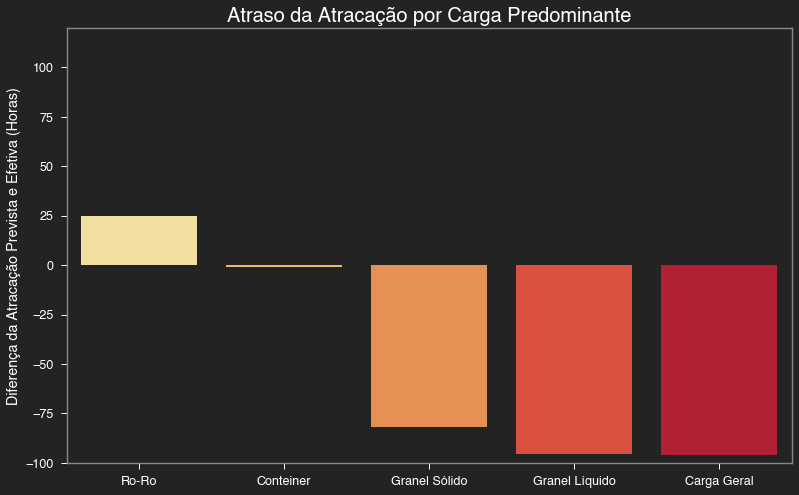

In [2995]:
sns.barplot(data=data.sort_values(['Data'])[:10][-1::-1],x='Especialidade da Carga Predominante',
            y='Data',palette='YlOrRd')
plt.title('Atraso da Atracação por Carga Predominante')
plt.ylabel('Diferença da Atracação Prevista e Efetiva (Horas)')
plt.xlabel('')
plt.ylim(-100,120,10);

In [3063]:
dex = stays['Atracação Efetiva'].astype('datetime64[ns]')
data = pd.DataFrame({'Date':dex.dt.date,'Hour':dex.dt.hour,
                     'Tipo de Embarcação':stays['Tipo de Embarcação'],'Data':(stays
    ['Atracação Prevista'] - stays['Atracação Efetiva']).astype('timedelta64[h]')}).groupby(
    ['Tipo de Embarcação'],as_index=False).mean()
data.drop(columns=['Hour'],inplace=True)
data.sort_values('Data',ascending=False,inplace=True)
data

,Tipo de Embarcação,Data
1,Carga refrigerada,36.266129
18,Roll-On Roll-Off,9.992204
8,Passageiro,2.144208
2,Ferry Boat,0.000000
15,Porta Contentor,-2.858965
10,Passageiros / Roll-On Roll-Off,-6.500000
12,Pesquisa,-6.701613
0,Carga Geral,-32.685303
17,Rebocador empurrador,-50.255504
16,Químico,-59.971778


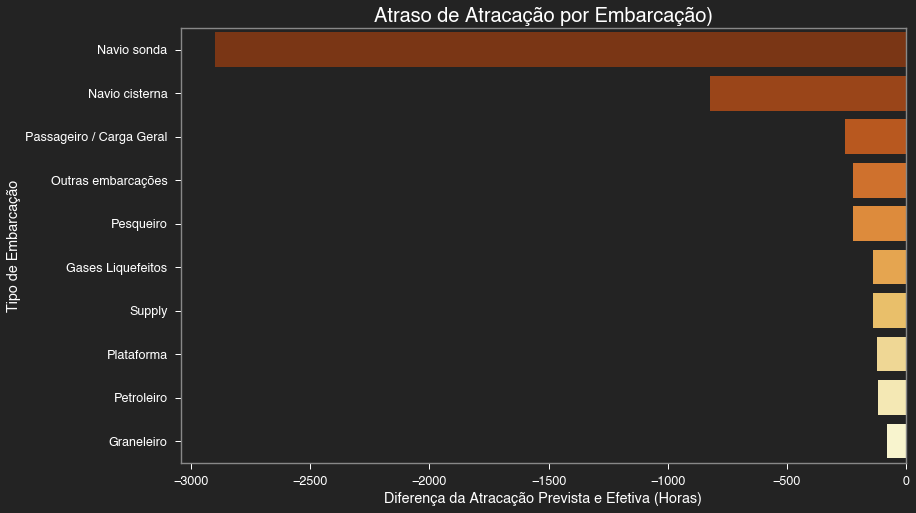

In [3064]:
sns.barplot(data=data.sort_values(['Data'])[:10],y='Tipo de Embarcação',x='Data',
            palette='YlOrBr_r')
plt.xlabel('Diferença da Atracação Prevista e Efetiva (Horas)')
plt.title('Atraso de Atracação por Embarcação)');

In [3078]:
data = pd.Series(data=(stays['Atracação Prevista'] - stays['Atracação Efetiva']).astype(
    'timedelta64[h]').values,index=stays['Atracação Efetiva'].astype(
    'datetime64[D]').values).groupby(level=0).mean().rolling(7).mean()

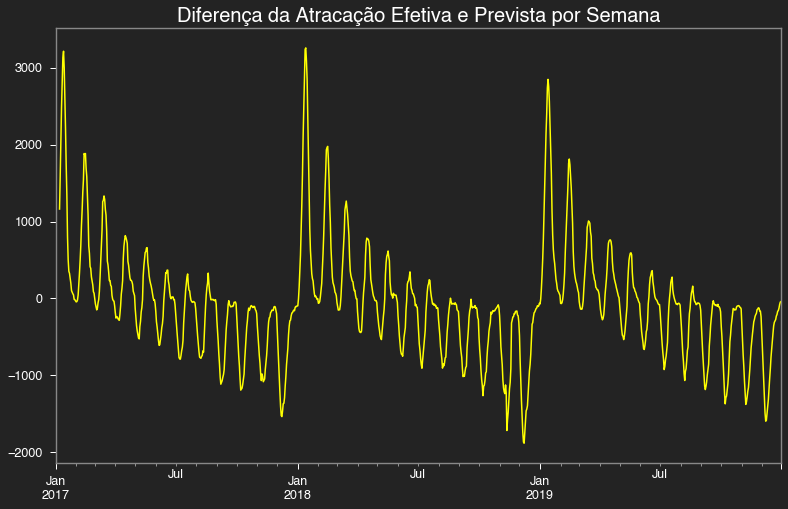

In [3079]:
data.plot(color='yellow')
plt.title('Diferença da Atracação Efetiva e Prevista por Semana');

## 1. Modelo de Previsão da Diferença entre Atracação Prevista e Efetiva
Aplicamos um algoritmo estatístico de sazonalidade múltipla para prever os erros de estimativa do horário de atracação. Com base nessas informações, os agentes podem reavaliar as previsões realizadas e otimizá-las, além de terem uma ferramenta que facilita a tomada de decisão sobre como otimizar a logística, visto que o modelo dá visibilidade de quais dias possuem mais erros.

In [3056]:
y_to_train = data.dropna()[:-219]
y_to_test = data.dropna()[-219:]
y_to_train

2017-01-07    1162.397755
2017-01-08    1615.443552
2017-01-09    2057.181255
2017-01-10    2493.141557
2017-01-11    2816.599172
                 ...     
2019-05-21     212.353014
2019-05-22     139.339032
2019-05-23     133.484392
2019-05-24      96.663476
2019-05-25      81.504059
Length: 869, dtype: float64

In [3059]:
from tbats import TBATS, BATS
# Fit the model
estimator = TBATS(seasonal_periods=(30.5,365.25))
model = estimator.fit(y_to_train)
# Forecast 219 days ahead 
y_forecast = model.forecast(steps=219)

In [2925]:
model.summary()

'Use Box-Cox: False\nUse trend: False\nUse damped trend: False\nSeasonal periods: [ 30.5  365.25]\nSeasonal harmonics [ 2 30]\nARMA errors (p, q): (3, 3)\nSmoothing (Alpha): 1.536796\nSeasonal Parameters (Gamma): [ 9.54647303e-05  6.09489756e-05 -1.09428315e-04 -2.27301548e-05]\nAR coefficients [-1.09428315e-04 -2.27301548e-05  2.75107208e-01]\nMA coefficients [-0.54909686  0.29138664 -0.72006515]\nSeed vector [ -89.69153705 -180.99378485   17.6147666    19.61187409  -81.57362588\n  230.36667212  150.14474233  137.58043305  130.8060325   155.61684839\n  159.67839269  146.95137097  161.83899125  163.51753989  196.24511116\n  315.74673566  -88.00581367 -103.49682113  -55.5558697   -29.2090368\n   12.02111082   63.65156558   50.34706098   15.09442864   -1.41028636\n   -6.34563482   -6.70806609   41.1440736  -211.09326093  -44.20222659\n  -17.40411182  -18.23717443   -3.6404489     6.52835764  -11.73915571\n  483.91666772  288.95233332  191.88739102  148.85385648   75.02991633\n   44.64461

### Validando o Modelo:

In [2926]:
# calculate MAE between expected and predicted last 219 observations
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
mae = mean_absolute_error(y_to_test, y_forecast)
rmse_1 = rmse(y_to_test, y_forecast)
mape = np.median(np.abs((y_to_test - y_forecast) / y_to_test)) * 100
print('MAE: %.2f' % mae)
print('RMSE: %.2f' % rmse_1)
print('MAPE: %.2f' % mape + '%')
accuracy = 100 - mape
print('Accuracy: %.2f' % accuracy + '%')

MAE: 100.54
RMSE: 139.01
MAPE: 28.41%
Accuracy: 71.59%


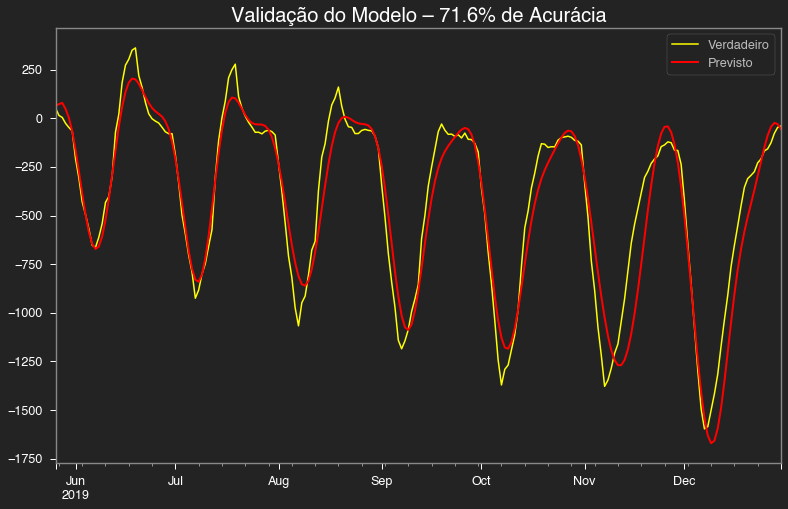

In [2941]:
# plot expected vs actual
plt.figure(figsize=(13,8))
y_to_test.plot(label='Verdadeiro',color='yellow')
pd.Series(data=y_forecast,index=y_to_test.index).plot(label='Previsto',lw=2,color='red')
plt.title('Validação do Modelo – 71.6% de Acurácia',size=20,color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.xlabel('')
plt.legend();

### Prevendo os dados futuros:

In [2948]:
from tbats import TBATS, BATS
# Fit the model
estimator = TBATS(seasonal_periods=(30.5,365.25))
model = estimator.fit(data.dropna())
# Forecast 219 days ahead 
y_forecast = model.forecast(steps=219)

In [2961]:
import datetime
date_list=[data.dropna().index[-1] + datetime.timedelta(days=x) for x in range(len(y_forecast)+1)]

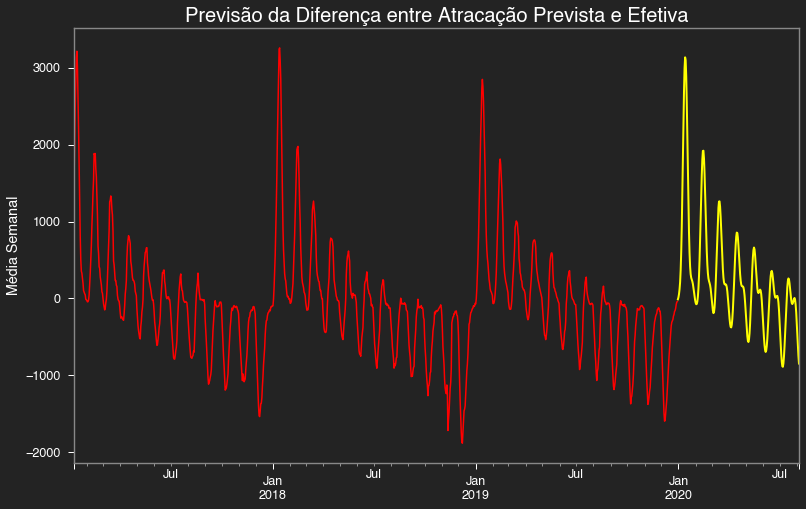

In [3080]:
# plot expected vs actual
plt.figure(figsize=(13,8))
data.dropna().plot(label='Série Histórica',color='red')
pd.Series(data=y_forecast,index=date_list[1:]).plot(label='Previsão',lw=2,color='yellow')
plt.title('Previsão da Diferença entre Atracação Prevista e Efetiva',size=20,color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.xlabel('')
plt.ylabel('Média Semanal');

### Analisando o Fundeadouro

In [2490]:
fund = pd.read_csv('/Users/pedrocerbino/Downloads/Fundeadouro_Entrada_Sa¡da.csv',sep=';')
for i in ['Data Entrada Fundeio','Data Saída Fundeio']:
    fundeadouro[i] = pd.to_datetime(fundeadouro[i],utc=True)
fundeadouro['Data Entrada Fundeio'] = fundeadouro['Data Entrada Fundeio'].astype('datetime64[ns]')
fundeadouro['Data Saída Fundeio'] = fundeadouro['Data Saída Fundeio'].astype('datetime64[ns]')
fundeadouro['Dif Fund Saída Entrada'] = (fundeadouro['Data Saída Fundeio'] - fundeadouro[
                                        'Data Entrada Fundeio']).astype('timedelta64[h]')
fundeadouro['Dia Entrada'] = fundeadouro['Data Entrada Fundeio'].astype('datetime64[D]')
fundeadouro['Hora Entrada'] = [i.hour for i in fundeadouro['Data Entrada Fundeio'].astype(
                                                                                'datetime64[h]')]
fundeadouro['Dia Saída'] = fundeadouro['Data Saída Fundeio'].astype('datetime64[D]')
fundeadouro['Hora Saída'] = [i.hour for i in fundeadouro['Data Saída Fundeio'].astype(
                                                                                'datetime64[h]')]
fundeadouro = fundeadouro[fundeadouro['Dif Fund Saída Entrada']>0].copy()
fundeadouro.head(2)

,Número do DUV,Porto,Identificador do Fundeadouro,Descrição do Fundeadouro,Data Entrada Fundeio,Data Saída Fundeio,Motivo do Fundeio,Dif Fund Saída Entrada,Dia Entrada,Hora Entrada,Dia Saída,Hora Saída
0,78d669ec8be6b1e6a6c5278a28b75a55,BRPEC - PECEM,F2,Fundeadouro nº 2,2017-01-01 00:06:00,2017-01-18 21:18:00,Aguardando Atracação,429.0,2017-01-01,0,2017-01-18,21
1,d81615be85cfa964d759151fd4028202,BRSSZ - SANTOS,4,Externo Nº 4,2017-01-01 00:10:00,2017-01-13 04:00:00,Aguardando Atracação,291.0,2017-01-01,0,2017-01-13,4


In [2529]:
fundeadouro.Porto.value_counts(True)[:15]

BRSSZ - SANTOS                      0.628542
BRSUA - SUAPE                       0.126134
BRARB - ARATU                       0.079459
BRPEC - PECEM                       0.055751
BRITJ - ITAJAÍ                      0.037600
BRIGI - ITAGUAÍ                     0.031209
BRRIG - RIO GRANDE                  0.024542
BRRCH - BARRA DO RIACHO - CODESA    0.006761
BRPNG - PARANAGUA                   0.002964
BRIQI - ITAQUI                      0.002130
BRREC - RECIFE                      0.000926
BRFOR - FORTALEZA (MUCURIPE)        0.000741
BRPOA - PORTO ALEGRE - RS           0.000556
BRVDC - VILA DO CONDE               0.000463
BRRIO - RIO DE JANEIRO              0.000463
Name: Porto, dtype: float64

In [3050]:
dex = fundeadouro['Data Saída Fundeio'].astype('datetime64[ns]')
data = pd.DataFrame({'Date':dex.dt.date,'Hour':dex.dt.hour,'Data':(fundeadouro
['Data Saída Fundeio'] - fundeadouro['Data Entrada Fundeio']).astype('timedelta64[h]')}).groupby(
['Date','Hour'],as_index=False).mean()

data['Média Diária'] = data.Data.rolling(24).mean()
data.set_index(data.Date,inplace=True)
data.drop(columns=['Date'],inplace=True)
data = data[:-12]
data

,Hour,Data,Média Diária
Date,,,
2017-01-01,12,2.0,NaN
2017-01-01,13,3.0,NaN
2017-01-01,17,2.0,NaN
2017-01-01,19,15.0,NaN
2017-01-01,22,7.0,NaN
...,...,...,...
2019-12-28,4,187.0,941.694444
2019-12-28,17,203.0,924.833333
2019-12-30,2,220.0,933.541667


### Plotando os dados de Fundeio

In [3049]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.Data.index, y=data.Data.values,
                         line=dict(color='rgba(240, 52, 52, 0.5)'), name='Dados'))
fig.add_trace(go.Scatter(x=data.Data.rolling(24*7).mean().index, 
                         y=data.Data.rolling(24*7).mean().values,
                         line=dict(color='yellow'), name='Média Móvel Semanal'))
fig.update_layout(template='plotly_dark')
fig.update_layout(title='Diferença da Saída e Entrada do Fundeio',
                  template='plotly_dark',
                  xaxis_title='Data',
                  yaxis_title='Total de Horas de Atraso')
fig.show();
# fig.write_html("/Users/pedrocerbino/Downloads/Graph_1.html")

## 2. Modelo de Previsão de Hiato no Fundeadouro
Usaremos o estudo de caso do Porto de Santos para desenvolver um modelo estatístico de regressão linear para estimar o quanto um navio espera na barra antes de atracar. Além de realizar a previsão, o modelo também mostra quais as variáveis são mais importantes para essa estimação.

In [2491]:
stays_santos = stays[stays['Código Bitrigrama'] == 'BRSSZ'].copy()
stays_santos['Atracação Efetiva'] = stays_santos['Atracação Efetiva'].astype('datetime64[ns]')
stays_santos['Atracação Prevista'] = stays_santos['Atracação Prevista'].astype('datetime64[ns]')
stays_santos['Dif Atrac Prev Efet'] = (stays_santos['Atracação Prevista'] - stays_santos[
                                        'Atracação Efetiva']).astype('timedelta64[h]')
stays_santos.head(2)

,Número do DUV,Estadia Off-Shore,Porto de estadia atual,Atracação Prevista,Atracação Efetiva,Desatracação Prevista,Desatracação Efetiva,Berço,Bandeira da Embarcação,Área de Navegação,Finalidade da Embarcação,Tipo de Embarcação,Motivo de Atracação,Tipo de Viagem Chegada,Tipo de Viagem Saída,Especialidade da Carga Predominante,Código Bitrigrama,Dif Atrac Prev Efet
1,77a23e1146e03847763ea5aaa70ecbc3,Não,BRSSZ - SANTOS,2017-01-01 02:00:00,2017-01-01 08:30:00,2017-02-01 01:00:00,2017-02-01 03:15:00,EPORT II,Libéria,IMPORT/EXPORT/LONGO CURSO,Transporte de Contentores,Porta Contentor,Carga e Descarga,EXPORTAÇÃO/LONGO CURSO,IMPORTAÇÃO/LONGO CURSO,Conteiner,BRSSZ,-7.0
7,44aa07b81067e37d74476980940230e6,Não,BRSSZ - SANTOS,2017-01-01 11:00:00,2017-01-01 11:35:00,2017-02-01 07:00:00,2017-02-01 18:05:00,BTP03,Hong Kong,IMPORT/EXPORT/LONGO CURSO,Transporte de Contentores,Porta Contentor,Carga e Descarga,EXPORTAÇÃO/LONGO CURSO,IMPORTAÇÃO/LONGO CURSO,Conteiner,BRSSZ,-1.0


### Dados de Chuva (Santos):
Os dados foram coletado da por meio da API da INMET, que disponibiliza esses dados gratuitamente. Foram analisados os dados da estação pluviométrica mais próxima do porto.

In [2492]:
import requests
r = requests.get('https://apitempo.inmet.gov.br/estacao/diaria/2017-01-01/2019-12-31/A765')
r = r.json()

In [2493]:
santos_chuva = pd.DataFrame(r)[['DT_MEDICAO','CHUVA']]
santos_chuva.DT_MEDICAO = pd.to_datetime(santos_chuva.DT_MEDICAO)
santos_chuva.CHUVA = [0 if str(i) == 'None' else float(i) for i in santos_chuva.CHUVA]
santos_chuva.head(5)

,DT_MEDICAO,CHUVA
0,2017-01-01,0.0
1,2017-01-02,0.0
2,2017-01-03,0.0
3,2017-01-04,0.0
4,2017-01-05,0.0


### Dados de Marés (Santos):
Os dados das marés foram coletados a partir do site do INPE, que registra os dados históricos que são produzidos pela Marinha.

In [2494]:
def limpa_dados(database):
    """
    Eliminando colunas e linhas desnecessárias para a análise
    """
    database.drop(inplace=True,columns=[i for i in database.columns if 'Unnamed: ' in i])
    database.reset_index(inplace=True,drop=True)
    database.drop(index=list(range(0,15)),inplace=True)
    database.reset_index(inplace=True,drop=True)
    database = database.T.reset_index().copy()
    return database

In [2495]:
def estrutura_dados(database):
    """
    Estruturando os dados para cada linha representar um dia, e cada coluna uma variável
    """
    cont = 0
    data_dict = {}
    for row in database.index:
        for col in database.columns[1:]:
            if '2020' in str(database[col][row]):
                cont += 1
                if cont > 12:
                    col_name = '2018' + str(database[col][row]).split(' ')[0][4:]
                elif cont > 24:
                    col_name = '2019' + str(database[col][row]).split(' ')[0][4:]
                else:
                    col_name = '2017' + str(database[col][row]).split(' ')[0][4:]
                data_dict[col_name] = []
            else:
                try:
                    value_hour = str(database[col][row]).split(' ')[0]
                    value_tide = str(database[col][row]).split(' ')[2]
                    data_dict[col_name].append(value_hour)
                    data_dict[col_name].append(value_tide)
                except:
                    pass
    return data_dict

In [2496]:
def entabela_dados(data_dict):
    """
    Transformando dados vazios em valores nulos para permitir estruturar em formato de tabela
    """
    for key in data_dict.keys():
        if len(data_dict[key]) != 16:
            max_iter = 16 - len(data_dict[key])
            for i in range(0,max_iter):
                data_dict[key].append(np.nan)
    return data_dict

In [2497]:
def ajusta_dados(data_dict):
    """
    Ajustes para facilitar manuseio: transpondo a matriz e renomeando as colunas
    """
    database = pd.DataFrame(data_dict).T.copy()
    database.columns=sorted([str(i)+'_Tide' for i in range(1,9)]+[str(i)+'_Clock' for i 
                                                                                    in range(1,9)])
    return database

In [2498]:
def preenche_dados(database,nome):
    """
    Preenchendo valores nulos na tabela com a última maré registrada
    """
    for row in database.index:
        for col in database.columns[-10:]:
            if str(database[col][row]) == 'nan':
                database[col][row] = database[str(int(col[0])-1)+col[1:]][row]
    for k in range(1,9):
        database[str(k)+'_Hour']=[i.hour for i in database[str(k)+'_Clock'].astype('datetime64[h]')]
    database.reset_index(inplace=True)
    database.rename(columns={'index':'Data'},inplace=True)
    database.Data = database.Data.astype('datetime64[D]')
    globals()[str(nome)] = database
    return database.head(2)

In [2499]:
santos = pd.read_excel('/Users/pedrocerbino/Downloads/Tábua de Marés - Porto de Santos.xlsx')
preenche_dados(ajusta_dados(entabela_dados(estrutura_dados(limpa_dados(santos)))),'porto_santos')

,Data,1_Clock,1_Tide,2_Clock,2_Tide,3_Clock,3_Tide,4_Clock,4_Tide,5_Clock,5_Tide,6_Clock,6_Tide,7_Clock,7_Tide,8_Clock,8_Tide,1_Hour,2_Hour,3_Hour,4_Hour,5_Hour,6_Hour,7_Hour,8_Hour
0,2017-01-01,04:28,1.4,10:24,0.5,16:00,1.2,23:38,0.1,23:38,0.1,23:38,0.1,23:38,0.1,23:38,0.1,4,10,16,23,23,23,23,23
1,2017-01-02,05:08,1.3,11:04,0.5,16:32,1.1,16:32,1.1,16:32,1.1,16:32,1.1,16:32,1.1,16:32,1.1,5,11,16,16,16,16,16,16


### Consolidando tabelas distintas em uma única

In [2502]:
merged = stays_santos.merge(fundeadouro[fundeadouro.Porto=='BRSSZ - SANTOS'].drop(columns='Porto'))
santos_merged = merged.merge(porto_santos,left_on=['Dia Entrada'],right_on=['Data'])
santos_merged = santos_merged.merge(santos_chuva,left_on=['Dia Entrada'],right_on=['DT_MEDICAO'])

### Construindo colunas contendo o horário de maré, e o nível de maré, mais próximo do de atracação

In [2503]:
tide_hour, tide = [], []
for row in santos_merged.index:
    for m,n in zip(['one','two','three','four','five','six','seven','eight'],range(1,9)):
        globals()[m]=np.abs(santos_merged['Hora Entrada'][row]-santos_merged[str(n)+'_Hour'][row])
    lower = min(one,two,three,four,five,six,seven,eight)
    m_last = 'test'
    for m,n in zip(['one','two','three','four','five','six','seven','eight'],range(1,9)):
        if globals()[m] == lower and globals()[m] != m_last:
            tide_hour.append(santos_merged[str(n)+'_Hour'][row])
            tide.append(santos_merged[str(n)+'_Tide'][row])
            break
        m_last = globals()[m]
santos_merged['Tide Hour'] = tide_hour
santos_merged['Tide'] = tide

### Criando colunas categóricas para dia e mês da atracação (dummies)
Essas coluna funcionarão para capturar o efeito fixo da sazonalidade de atrasos ao longo do ano

In [2504]:
santos_merged['Day Control'] = [str(i.day) for i in santos_merged['Dia Entrada']]
santos_merged['Month Control'] = [str(i.month) for i in santos_merged['Dia Entrada']]
santos_merged['Year Control'] = [str(i.year) for i in santos_merged['Dia Entrada']]
santos_merged['Weekday Control'] = [str(i.weekday()) for i in santos_merged['Dia Entrada']]

In [2620]:
to_model = pd.get_dummies(santos_merged,columns=['Day Control','Month Control','Year Control',
                                                 'Tipo de Embarcação'], drop_first=True)
to_model.head(2)

,Número do DUV,Estadia Off-Shore,Porto de estadia atual,Atracação Prevista,Atracação Efetiva,Desatracação Prevista,Desatracação Efetiva,Berço,Bandeira da Embarcação,Área de Navegação,Finalidade da Embarcação,Motivo de Atracação,Tipo de Viagem Chegada,Tipo de Viagem Saída,Especialidade da Carga Predominante,Código Bitrigrama,Dif Atrac Prev Efet,Identificador do Fundeadouro,Descrição do Fundeadouro,Data Entrada Fundeio,Data Saída Fundeio,Motivo do Fundeio,Dif Fund Saída Entrada,Dia Entrada,Hora Entrada,Dia Saída,Hora Saída,Data,1_Clock,1_Tide,2_Clock,2_Tide,3_Clock,3_Tide,4_Clock,4_Tide,5_Clock,5_Tide,6_Clock,6_Tide,7_Clock,7_Tide,8_Clock,8_Tide,1_Hour,2_Hour,3_Hour,4_Hour,5_Hour,6_Hour,7_Hour,8_Hour,DT_MEDICAO,CHUVA,Tide Hour,Tide,Weekday Control,Day Control_10,Day Control_11,Day Control_12,Day Control_13,Day Control_14,Day Control_15,Day Control_16,Day Control_17,Day Control_18,Day Control_19,Day Control_2,Day Control_20,Day Control_3,Day Control_4,Day Control_5,Day Control_6,Day Control_7,Day Control_8,Day Control_9,Month Control_10,Month Control_11,Month Control_12,Month Control_2,Month Control_3,Month Control_4,Month Control_5,Month Control_6,Month Control_7,Month Control_8,Month Control_9,Year Control_2018,Tipo de Embarcação_Carga refrigerada,Tipo de Embarcação_Gases Liquefeitos,Tipo de Embarcação_Graneleiro,Tipo de Embarcação_Outras embarcações,Tipo de Embarcação_Passageiro,Tipo de Embarcação_Pesquisa,Tipo de Embarcação_Petroleiro,Tipo de Embarcação_Porta Contentor,Tipo de Embarcação_Químico,Tipo de Embarcação_Rebocador empurrador,Tipo de Embarcação_Roll-On Roll-Off,Tipo de Embarcação_Supply
0,44aa07b81067e37d74476980940230e6,Não,BRSSZ - SANTOS,2017-01-01 11:00:00,2017-01-01 11:35:00,2017-02-01 07:00:00,2017-02-01 18:05:00,BTP03,Hong Kong,IMPORT/EXPORT/LONGO CURSO,Transporte de Contentores,Carga e Descarga,EXPORTAÇÃO/LONGO CURSO,IMPORTAÇÃO/LONGO CURSO,Conteiner,BRSSZ,-1.0,3,Externo Nº 3,2017-01-01 10:00:00,2017-01-01 12:01:00,Aguardando Atracação,2.0,2017-01-01,10,2017-01-01,12,2017-01-01,04:28,1.4,10:24,0.5,16:00,1.2,23:38,0.1,23:38,0.1,23:38,0.1,23:38,0.1,23:38,0.1,4,10,16,23,23,23,23,23,2017-01-01,0.0,10,0.5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,e41dd40a28f08611a9b1f302af5684bd,Não,BRSSZ - SANTOS,2017-01-01 04:00:00,2017-01-01 11:45:00,2017-02-01 07:00:00,2017-03-01 02:10:00,EPORT I,"Marshall, Ilhas",IMPORT/EXPORT/LONGO CURSO,Transporte de Contentores,Carga e Descarga,EXPORTAÇÃO/LONGO CURSO,IMPORTAÇÃO/LONGO CURSO,Conteiner,BRSSZ,-8.0,3,Externo Nº 3,2017-01-01 10:00:00,2017-01-01 12:01:00,Aguardando Atracação,2.0,2017-01-01,10,2017-01-01,12,2017-01-01,04:28,1.4,10:24,0.5,16:00,1.2,23:38,0.1,23:38,0.1,23:38,0.1,23:38,0.1,23:38,0.1,4,10,16,23,23,23,23,23,2017-01-01,0.0,10,0.5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [2621]:
santos_chuva = pd.DataFrame(r)[['DT_MEDICAO','CHUVA']]
santos_chuva.DT_MEDICAO = pd.to_datetime(santos_chuva.DT_MEDICAO)
santos_chuva.CHUVA = [0 if str(i) == 'None' else float(i) for i in santos_chuva.CHUVA]
santos_chuva.head(5)

,DT_MEDICAO,CHUVA
0,2017-01-01,0.0
1,2017-01-02,0.0
2,2017-01-03,0.0
3,2017-01-04,0.0
4,2017-01-05,0.0


### Selecionando as colunas que servirão de variáveis explicativas para o modelo

In [2624]:
cols=['Tide','CHUVA','Tipo de Embarcação_Graneleiro']+[i for i in to_model.columns if 'Day Control'
                                               in i or 'Month Control' in i or 'Year Control' in i]

In [2625]:
X = to_model[cols]
y = to_model['Dif Fund Saída Entrada']

In [3070]:
import cvxopt
import statsmodels.api as sm
est = sm.OLS(y, X.astype(float)).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Dif Fund Saída Entrada   R-squared (uncentered):                   0.849
Model:                                OLS   Adj. R-squared (uncentered):              0.847
Method:                     Least Squares   F-statistic:                              384.3
Date:                    Sun, 22 Nov 2020   Prob (F-statistic):                        0.00
Time:                            09:26:35   Log-Likelihood:                         -19536.
No. Observations:                    2360   AIC:                                  3.914e+04
Df Residuals:                        2326   BIC:                                  3.934e+04
Df Model:                              34                                                  
Covariance Type:                nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Tide                            197.9694     41.066      4.821      0.000     117.439     278.500
CHUVA                            -2.7932      0.923     -3.026      0.003      -4.603      -0.983
Tipo de Embarcação_Graneleiro   205.4980     44.842      4.583      0.000     117.563     293.433
Day Control_10                 5535.3895    123.656     44.764      0.000    5292.901    5777.878
Day Control_11                 6098.0012    116.267     52.448      0.000    5870.004    6325.999
Day Control_12                 6468.0693    114.659     56.411      0.000    6243.225    6692.914
Day Control_13                 2430.2488    118.219     20.557      0.000    2198.422    2662.075
Day Control_14                 2488.3668    123.486     20.151      0.000    2246.212    2730.522
Day Control_15                 2506.1596    123.032     20.370      0.000    2264.895    2747.424
Day Control_16                 2382.0817    120.945     19.696      0.000    2144.910    2619.253
Day Control_17                 2349.4664    121.928     19.269      0.000    2110.368    2588.565
Day Control_18                 2409.6825    120.592     19.982      0.000    2173.204    2646.161
Day Control_19                 2441.5402    125.139     19.511      0.000    2196.144    2686.936
Day Control_2                  1198.3933    166.551      7.195      0.000     871.789    1524.997
Day Control_20                 2372.6958    120.001     19.772      0.000    2137.376    2608.015
Day Control_3                  1846.9818    158.483     11.654      0.000    1536.198    2157.765
Day Control_4                  2424.8188    132.755     18.265      0.000    2164.489    2685.149
Day Control_5                  2948.7012    139.265     21.173      0.000    2675.605    3221.798
Day Control_6                  3424.3721    128.223     26.706      0.000    3172.929    3675.815
Day Control_7                  4009.4894    126.706     31.644      0.000    3761.021    4257.958
Day Control_8                  4758.8184    122.983     38.695      0.000    4517.650    4999.987
Day Control_9                  5035.7312    124.860     40.331      0.000    4790.883    5280.579
Month Control_10              -2373.5008    105.992    -22.393      0.000   -2581.350   -2165.652
Month Control_11              -2281.3874    107.640    -21.195      0.000   -2492.468   -2070.307
Month Control_12              -2061.0361    111.478    -18.488      0.000   -2279.644   -1842.429
Month Control_2                -469.5788     86.398     -5.435      0.000    -639.005    -300.153
Month Control_3                -786.0344     91.516     -8.589      0.000    -965.495    -606.574


Pelo modelo, é possível perceber que atingimos praticamente **85% de acuácia preditiva**. Além disso, dado que o p-valor de todas as variáveis explicativas tende a zero, existe forte evidência de impacto estatisticamente significante destas em prever o tempo de demora que um navio levará no fundeadouro. Esta informação pode ser valiosa para **planejar um line-up mais eficiente.**